In [1]:
import pandas as pd
import numpy as np
import sqlite3 as lite
from scipy import stats

In [2]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner

In [3]:
import collections

testlist = [1, 4, 5, 6, 9, 9, 9]
c = collections.Counter(testlist) #Counter takes a list and counts how many times each list element occurs
print c

# calculate the number of instances in the list; len(list) is the same thing
count_sum = sum(c.values())
print count_sum
print len(testlist)

Counter({9: 3, 1: 1, 4: 1, 5: 1, 6: 1})
7
7


In [4]:
#Create a frequency ratio for each of the unique list elements:
for k,v in c.iteritems(): #'c' returns a tuple like structure; the unique element in a list and the corresponding
    #value count for that unique item. Thus - k,v in c simply means for each tuple pair perform ....
    print "The frequency of number " + str(k) + " is " + str(float(v) / count_sum)

The frequency of number 1 is 0.142857142857
The frequency of number 4 is 0.142857142857
The frequency of number 5 is 0.142857142857
The frequency of number 6 is 0.142857142857
The frequency of number 9 is 0.428571428571


### Generating a Box Plot

In [5]:
matplotlib inline 

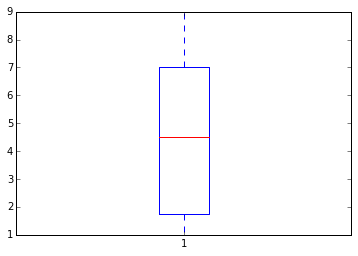

In [6]:
import matplotlib.pyplot as plt

x = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9]
plt.boxplot(x)
plt.show()

You can save the plot by using the savefig() function in pyplot instead of show(). You call it on the plt object and pass in the filename you wish to use. For example, to save the file as "boxplot.png", you'd type plt.savefig("boxplot.png"). This will save the current plt object with the filename you specified.

### Generate a Histogram of the Data

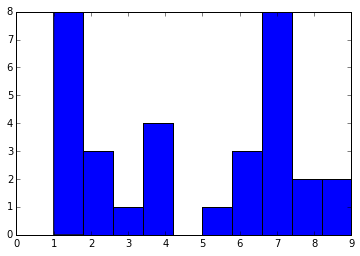

In [7]:
plt.hist(x, histtype='bar')
plt.show()

### QQ Plots

Given a set of data, it is often useful to test whether or not it belongs to a certain distribution. Testing for normality (whether or not the data is normally distributed) is a popular initial step when inspecting data. To visually test data, you can create a QQ Plot, which plots a given set of data against the theoretical quantiles of normally-distributed data with the same mean and standard deviation of the data set in question. When plotted out, the data should form a straight line. 

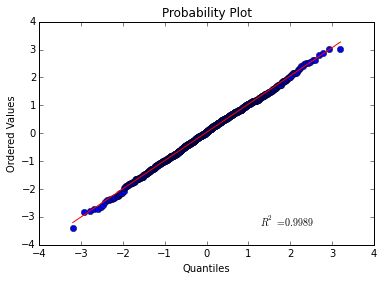

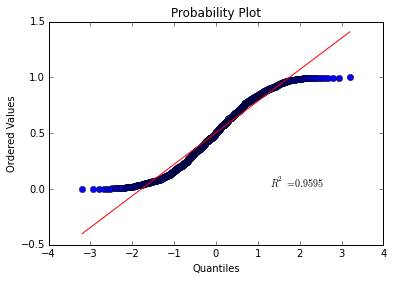

In [8]:
plt.figure()
test_data = np.random.normal(size=1000)   
graph1 = stats.probplot(test_data, dist="norm", plot=plt)
plt.show() #this will generate the first graph

plt.figure()
test_data2 = np.random.uniform(size=1000)   
graph2 = stats.probplot(test_data2, dist="norm", plot=plt)
plt.show() #this will generate the second graph

The first graph tests data generated by a normal random function. The data (circles) hews closely to the theoretical line drawn by the graph. The second graph, however tests data generated by a uniform random function which veers far from the theoretical line, since the data is not normal. 

## Challenge

Write a script called "prob.py" that outputs frequencies, as well as creates and saves a boxplot, a histogram, and a QQ-plot for the data in this lesson. Make sure your plots have names that are reasonably descriptive. Push your code to GitHub and enter the link below.

In [9]:
def graph_builder(list):
    
    freq_counter = collections.Counter(list)
    for k,v in freq_counter.iteritems(): 
        print "The frequency of number " + str(k) + " is " + str(float(v) / len(list))
        
    print ''
    print 'Box Plot'
    plt.boxplot(list)
    plt.show() 
    
    print ''
    print 'Histogram'
    plt.hist(list, histtype='bar')
    plt.show()
    
    print ''
    print 'QQ Plot'
    stats.probplot(list, dist="norm", plot=plt)
    plt.show() 

The frequency of number 1 is 0.25
The frequency of number 2 is 0.09375
The frequency of number 3 is 0.03125
The frequency of number 4 is 0.125
The frequency of number 5 is 0.03125
The frequency of number 6 is 0.09375
The frequency of number 7 is 0.25
The frequency of number 8 is 0.0625
The frequency of number 9 is 0.0625

Box Plot


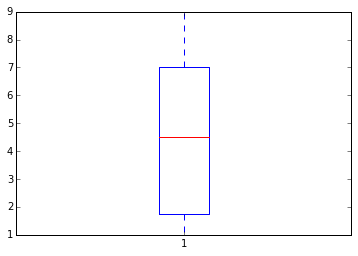


Histogram


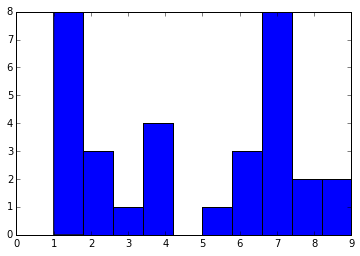


QQ Plot


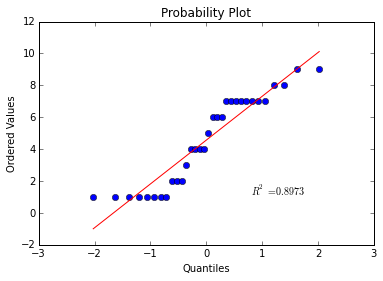

In [10]:
graph_builder(x)

### Cleaning the Lending Club Data

In [11]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


In [12]:
#To start off with, we need to remove rows with null values so that we can better visualize the dataset.
loansData.dropna(inplace=True)

C:\Users\griggrj\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\tools\plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


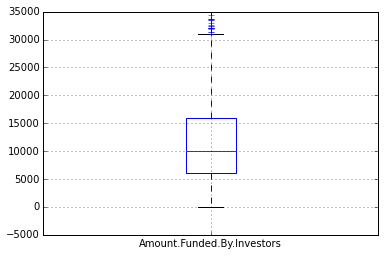

In [13]:
#create a boxplot to look at the data from a specific column:
loansData.boxplot(column='Amount.Funded.By.Investors')
plt.show()

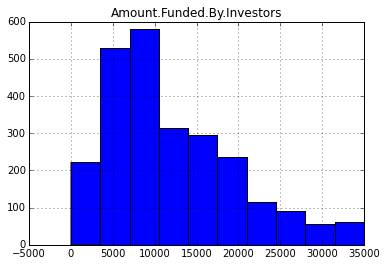

In [14]:
#look at the same column as a histogram:
loansData.hist(column='Amount.Funded.By.Investors')
plt.show()

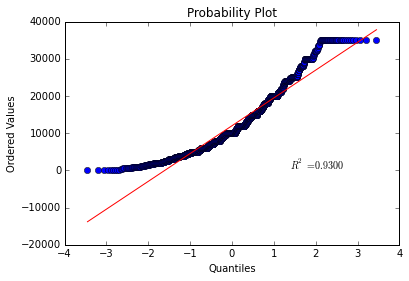

In [15]:
#test this data in a qq plot to see how normal it's distributed:
stats.probplot(loansData['Amount.Funded.By.Investors'], dist="norm", plot=plt)
plt.show()

This data does not follow a normal distribution; which is apparent from the the histogram and now confirmed via qq plot

## Challenge

Write a script called "prob_lending_club.py" that reads in the loan data, cleans it, and loads it into a pandas DataFrame. Use the script to generate and save a boxplot, histogram, and QQ-plot for the values in the "Amount.Requested" column. Be able to describe the result and how it compares with the values from the "Amount.Funded.By.Investors".

In [16]:
def prob_lending_club(website):
    
    data = pd.read_csv(website)
    data.dropna(inplace=True)
    
    df = pd.DataFrame(data)
    col_interested = df.columns[0]
    
    print 'Box Plot:', col_interested
    df.boxplot(column=col_interested)
    plt.show()
    
    print ''
    print 'Histogram:', col_interested
    df.hist(column=col_interested)
    plt.show()
    
    print ''
    print 'QQ-Plot:', col_interested
    stats.probplot(df[col_interested], dist="norm", plot=plt)
    plt.show()

Box Plot: Amount.Requested


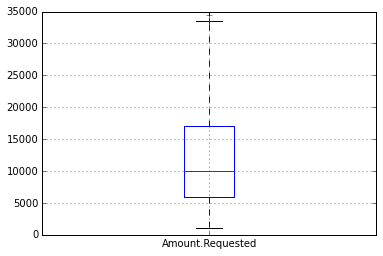


Histogram: Amount.Requested


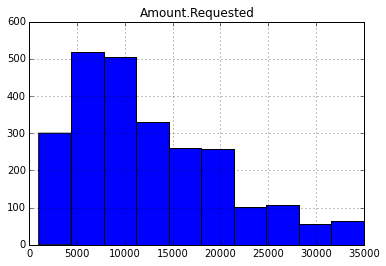


QQ-Plot: Amount.Requested


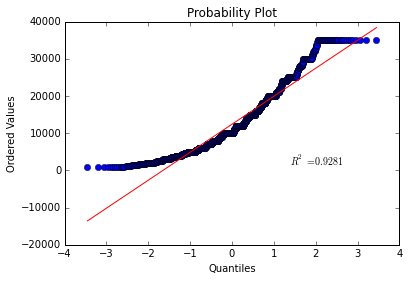

In [17]:
prob_lending_club('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

The two columns produce almost identical results; which means the data in both columns must be very similar. 

## Testing Loan Data

#### Goodness of Fit: The Chi-Square Test

A chi-squared distribution with k degrees of freedom is a distribution of the sum of the squares of all the k variables, where k is an independent standard normal random variable. That is, k is a random variable with a normal ditribution and it is not dependent on any other variable. The chi-squared distribution samples all of these k's, squares the samples, and then sums them up. The resultant collection of data is a chi-squared distribution.

A chi-square test is simply a hypothesis test that is run on a dataset to tell you how well your data is modeled by the chi-square distribution; it answers the question, "How well does this data fit my model?"—hence, goodness of fit. It is useful when we want to understand variations in the frequency of categorical data.

In [18]:
#from above - the loans data set is already opened with the 'nan' dropped - we don't need to reload this data. 
#Apply chi-square test on 'Open.CREDIT.Lines' column of the data:

freq = collections.Counter(loansData['Open.CREDIT.Lines'])
freq

Counter({8.0: 262, 9.0: 237, 6.0: 232, 7.0: 216, 11.0: 187, 10.0: 185, 13.0: 158, 5.0: 153, 12.0: 153, 14.0: 138, 4.0: 106, 15.0: 96, 16.0: 66, 3.0: 60, 17.0: 58, 18.0: 51, 19.0: 30, 21.0: 26, 2.0: 24, 20.0: 23, 23.0: 11, 22.0: 8, 24.0: 7, 25.0: 4, 26.0: 3, 31.0: 1, 34.0: 1, 36.0: 1, 38.0: 1})

Bar Graph


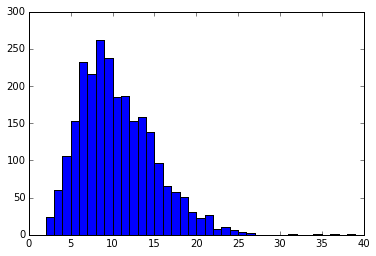


QQ Plot


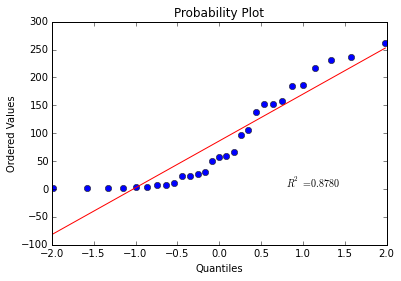

In [20]:
#is this data normally distributed? uniformly distributed?
print 'Bar Graph'
plt.bar(freq.keys(), freq.values(), width=1)
plt.show()

print ''
print 'QQ Plot'
stats.probplot(freq.values(), dist="norm", plot=plt) #since we are pulling the data from a Counter data structure, we need to
#call '.values()' after the data source name (in this case 'freq') in order for the graph to pull the right data values. If this
#was a dataframe column; we would only need to reference the column (as we did in the above qq plots).
plt.show()

In [25]:
#Perform a Chi-Squared test (scipy.stats.chisquare) to verify our answer.

chi, p = stats.chisquare(freq.values()) #Calculates a one-way chi square test. 
#***************************** IMPORTANT NOTE ***************************************************
#The chi square test tests the null hypothesis that the categorical data has the given frequencies.
#In this case, since we are not giving the test expected values, the test assumes all frequencies are equally likely.
#************************************************************************************************
chi, p

(2408.4331465172145, 0.0)

In the above case, the results state that the data is definitely not uniformly distributed. The expected values are obviously
different for each value. We would need the expected values in order to see how well this data fit those values. 

Good Notes with Example on chi-square test: http://www.stat.yale.edu/Courses/1997-98/101/chigf.htm

## Challenge

Write a script called "chi_squared.py" that loads the data, cleans it, performs the chi-squared test, and prints the result. Push your code to Github and enter the link below.

In [30]:
def chi_square_func(website):
    
    data = pd.read_csv(website)
    data.dropna(inplace=True)
    
    df = pd.DataFrame(data)
    col_interested = df.columns[10]
                    
    print 'Chi-Squared Test:', col_interested
    
    chi, p = stats.chisquare(df[col_interested])
    
    print 'test statistic:', chi
    print 'p-value:', p
    
    if p < 0.05:
        print 'The data is not uniformly distributed'
    else:
        print 'There is insufficient evidence to suggest the data is not uniformly distributed'

In [31]:
chi_square_func('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

Chi-Squared Test: Open.CREDIT.Lines
test statistic: 5037.75410227
p-value: 7.80773073142e-174
The data is not uniformly distributed
